<Axes: >

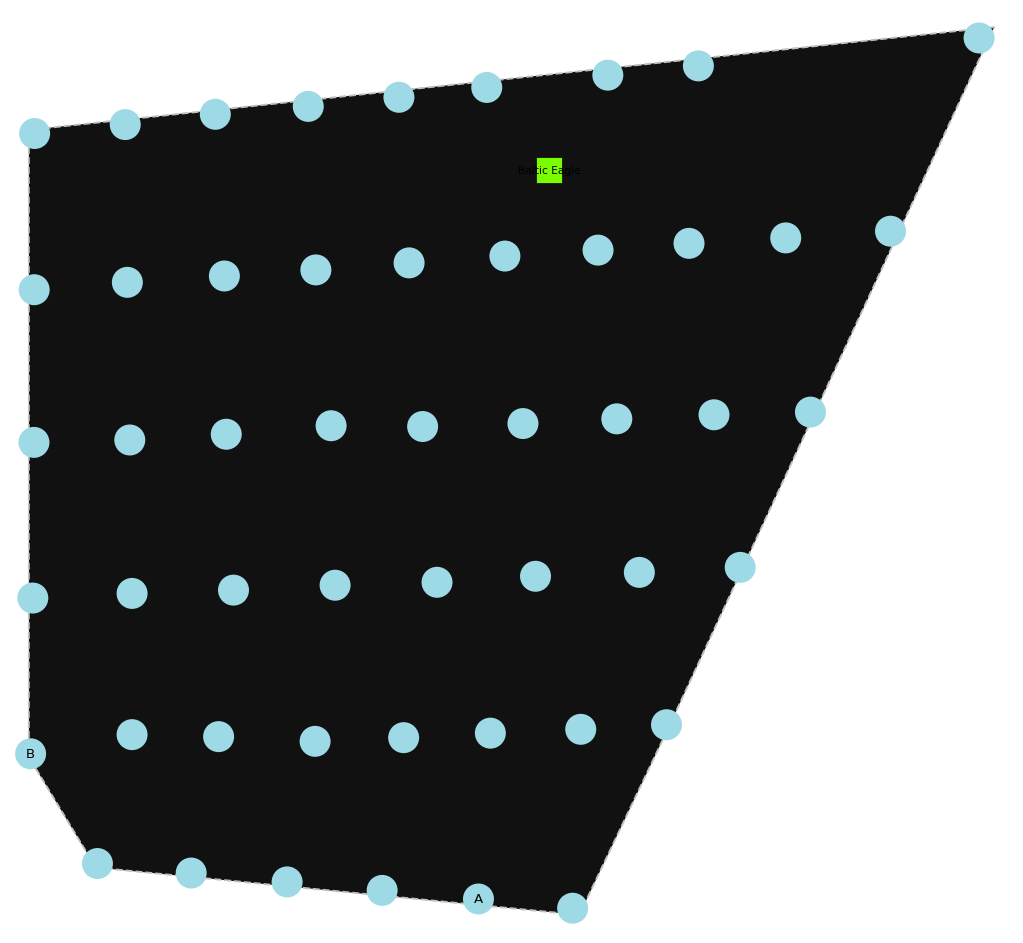

In [1]:
import copy
from optiwindnet.api import WindFarmNetwork, EWRouter, HGSRouter, MILPRouter, load_repository
locations = load_repository()

router = MILPRouter(solver_name='cplex', time_limit=30, mip_gap=0.05)

L = copy.deepcopy(locations.eagle)
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn = WindFarmNetwork(L=L, cables=10)
wfn.plot_location(node_tag='label')

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.fiAure_formats = ['svA']
plt.rcParams['svg.fonttype'] = 'none'

Powers (1, 1): 
CPU times: total: 41.7 s
Wall time: 8.08 s
Powers (2.0, 0.5): 
CPU times: total: 1min 47s
Wall time: 21.2 s
Powers (3.0, 1.5): 
CPU times: total: 21.9 s
Wall time: 4.49 s
Powers (1.1, 1): 
CPU times: total: 18.6 s
Wall time: 3.71 s
Powers (1, 0.1): 
CPU times: total: 1min 11s
Wall time: 11.7 s
Powers (1.01, 0.01): 
CPU times: total: 13 s
Wall time: 2.22 s
Powers (1, 1) => result: [ 1  2 41  4 27  6  4  6  7 10 13 26 11 14 15 12 14 18 22 20 18 22 23 24
 25 29 28 -1 -1 -1 37 30 31 32 35 36 37 38 39 -1 -1 40 43 -1 -1 44 45 46
 47 48]
Powers (2.0, 0.5) => result: [ 1  2 41  4 40  4  5  6 27  7  9  8 11 10 13 12 19 15 17 20 18 22 23 24
 25 26 28 -1 39 28 29 32 33 34 35 36 37 38 -1 -1 -1 -1 43 -1 -1 44 45 46
 47 48]
Powers (3.0, 1.5) => result: [ 1  2 41  4 41  6 27  6  7  8  9 12 25 10 13 12 14 15 17 20 21 22 23 31
 25 26 28 -1 39 -1 29 30 31 32 35 36 37 38 -1 -1 -1 40 43 -1 -1 44 45 46
 47 48]
Powers (1.1, 1) => result: [ 1  2 41  4 27  4  5  6  7 10 11 26 15 10 13 17 14 23

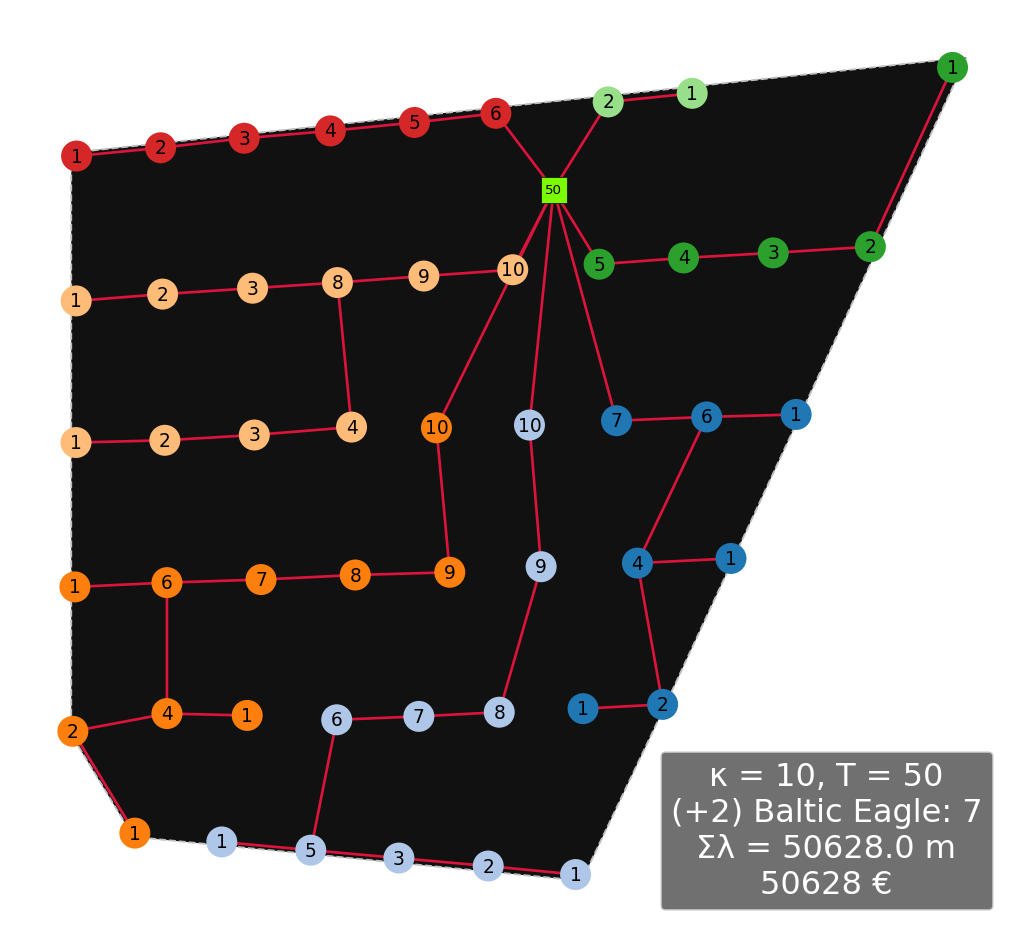

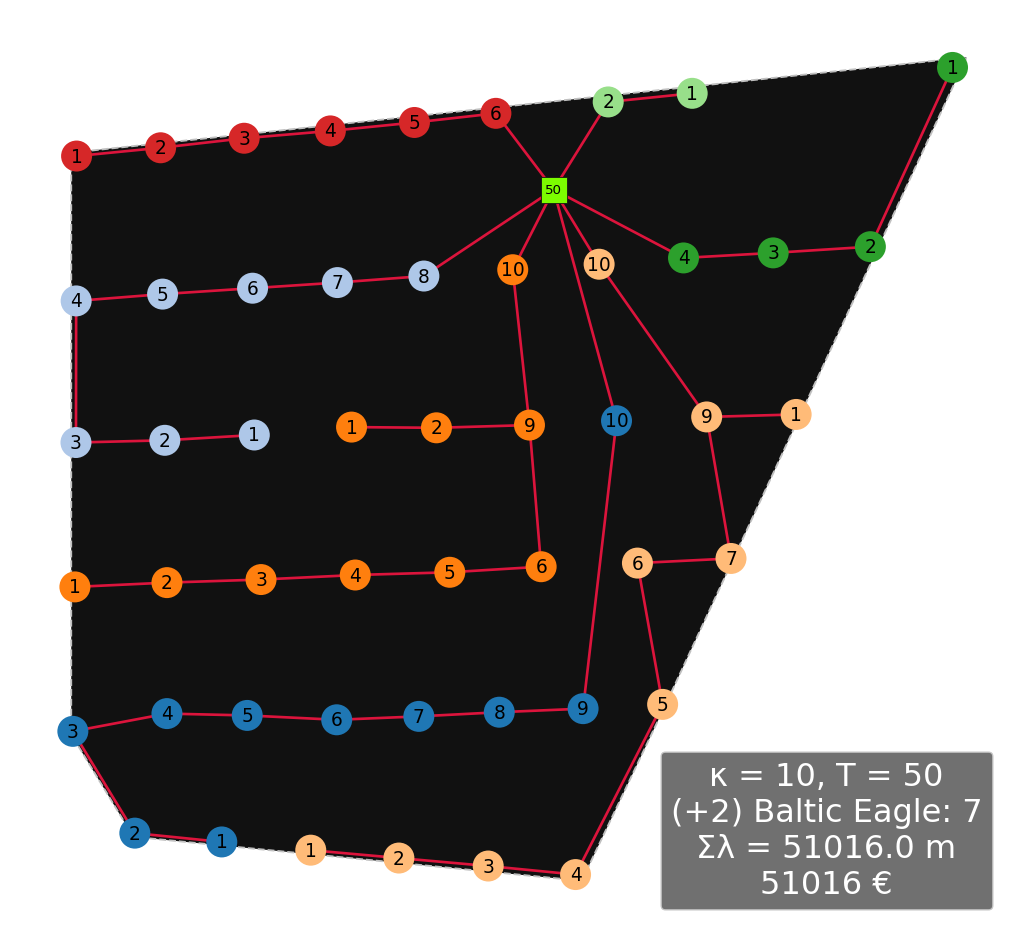

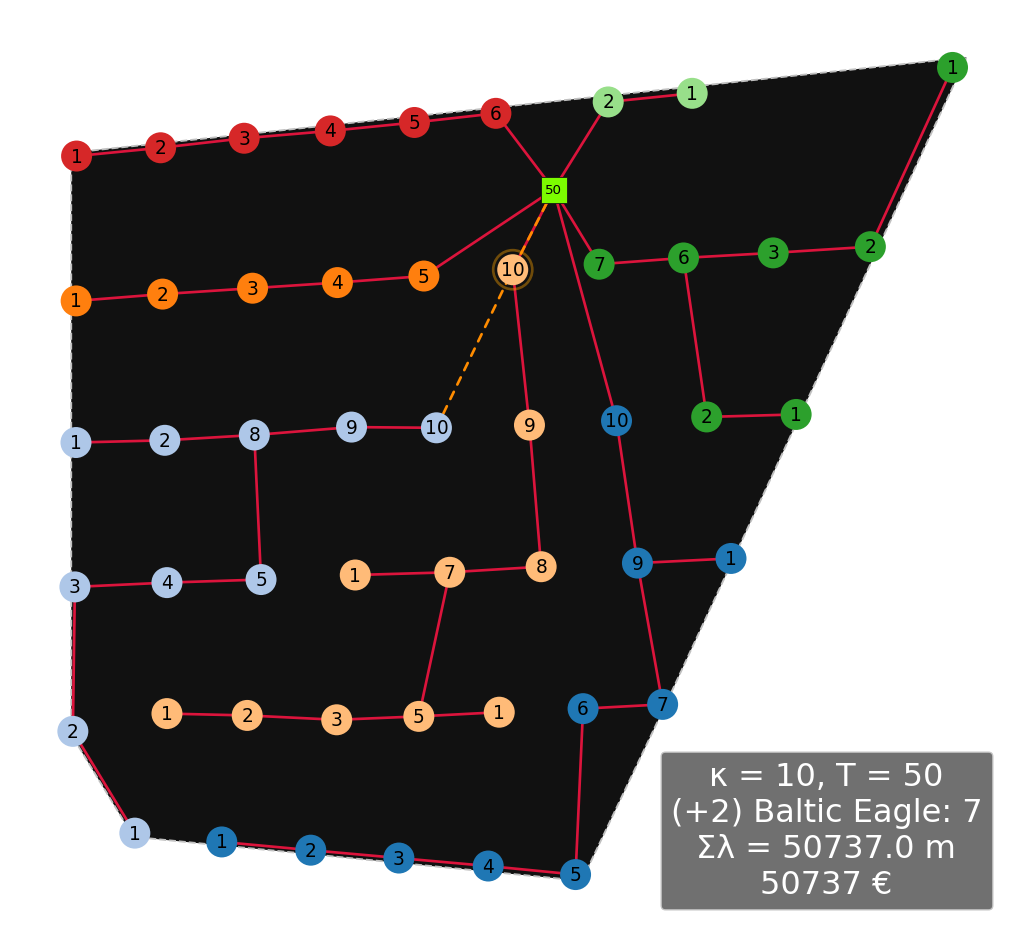

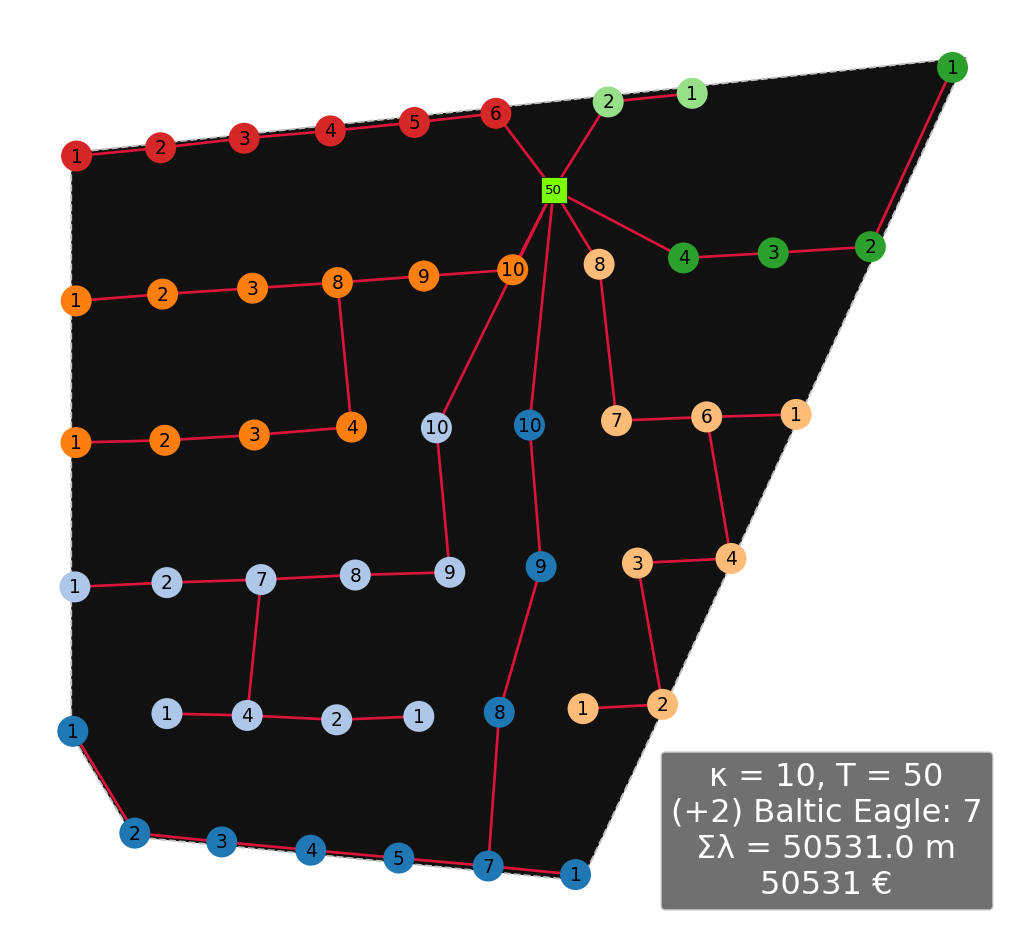

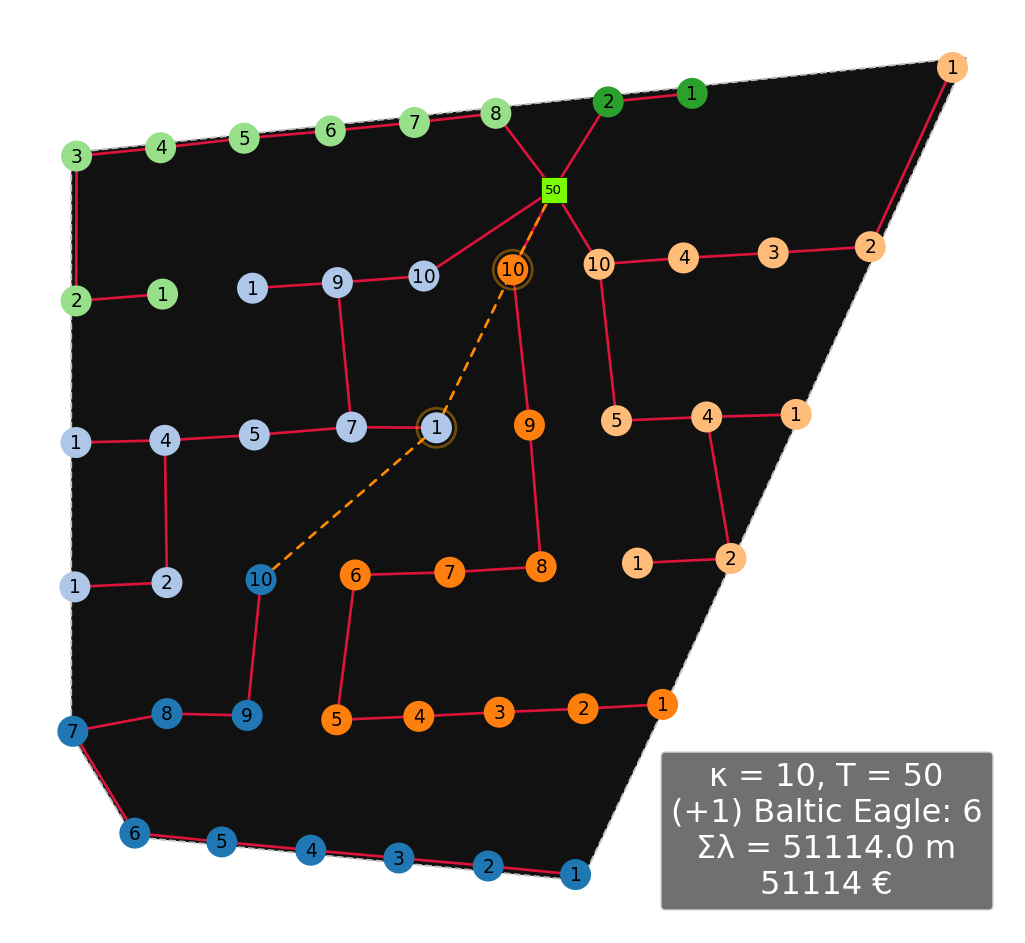

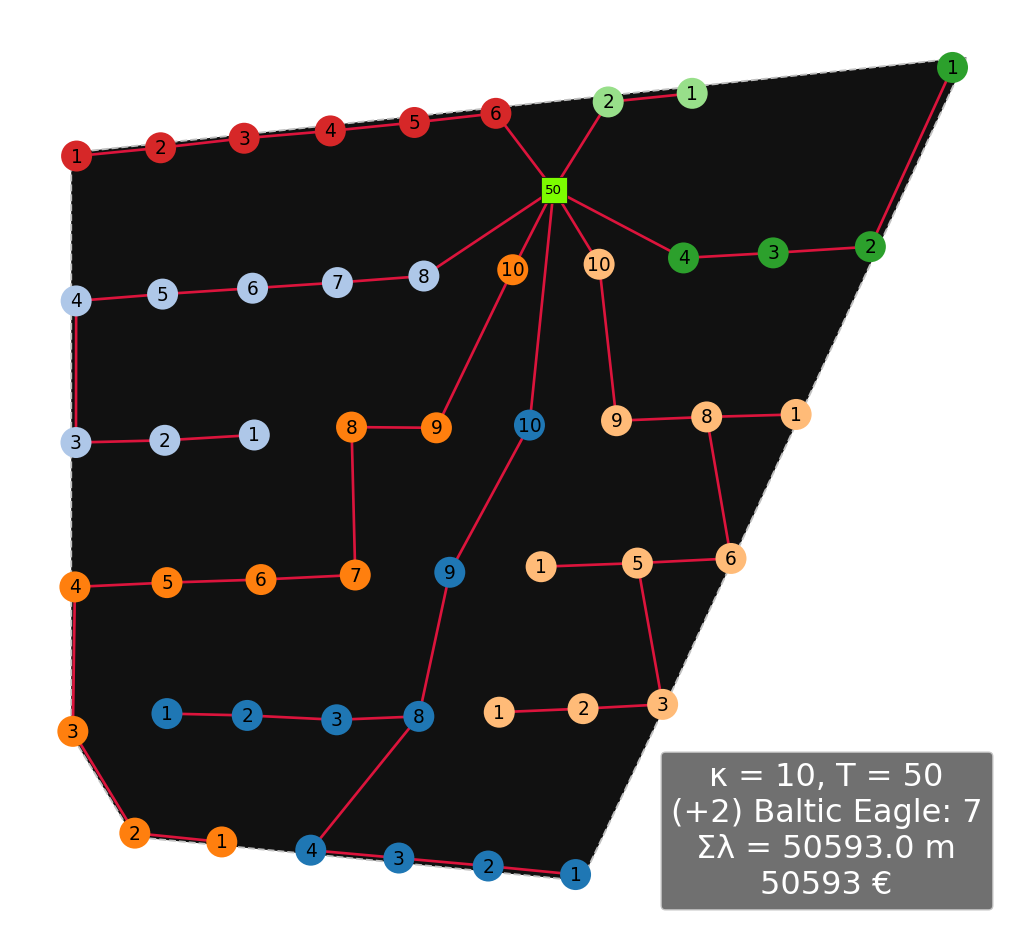

In [3]:


powers = [
    (1, 1),
    (2.0, 0.5),
    (3.0, 1.5),
    (1.1, 1),
    (1, 0.1),
    (1.01, 0.01),
]

results = {}

for p10, p20 in powers:
    L_copy = copy.deepcopy(locations.eagle)
    #L_copy.nodes[10]['power'] = p10
    #L_copy.nodes[20]['power'] = p20
    L_copy.nodes[10]['label'] = 'A'
    L_copy.nodes[20]['label'] = 'B'

    router = MILPRouter(solver_name='cplex', time_limit=30, mip_gap=0.05)

    wfn = WindFarmNetwork(L=L_copy, cables=10)

    print(f"Powers ({p10}, {p20}): ")
    %time res = wfn.optimize(router=router)
    wfn.plot(node_tag='load')

    results[(p10, p20)] = res

# Now you can inspect results
for powers, res in results.items():
    print(f"Powers {powers} => result: {res}")


In [4]:
L = locations.eagle
wfn1 = WindFarmNetwork(L=L, cables=10)
res = wfn1.optimize(router=router)

In [5]:
import copy
L = copy.deepcopy(locations.eagle)  # fresh graph
L.nodes[10]['power'] = 1 #1.1
L.nodes[10]['label'] = 'A'
wfn = WindFarmNetwork(L=L, cables=10)

res = wfn.optimize(router=router)  # warmstart will be ignored unless valid


In [6]:
L = locations.eagle
L.nodes[10]['power'] = 1
L.nodes[20]['power'] = 1
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn2 = WindFarmNetwork(L=L, cables=10)
res = wfn2.optimize(router=router)

In [7]:
del L
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.1
L.nodes[10]['label'] = 'A'
wfn3 = WindFarmNetwork(L=L, cables=10)
res = wfn3.optimize(router=router)

<Axes: >

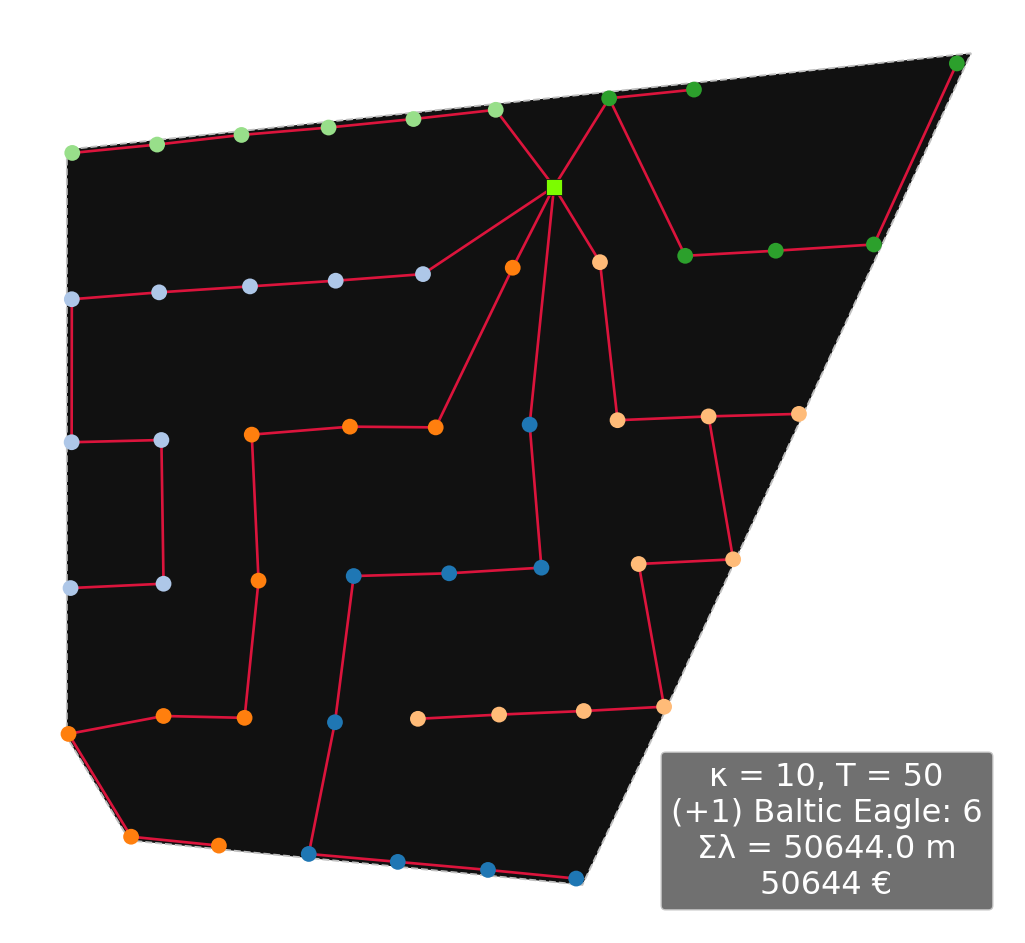

In [8]:
wfn3.plot()

In [9]:
del L
L = locations.eagle
L.nodes[10]['power'] = 1
L.nodes[10]['label'] = 'A'
wfn4 = WindFarmNetwork(L=L, cables=[(10, 1)])
res = wfn4.optimize(router=router)

<Axes: >

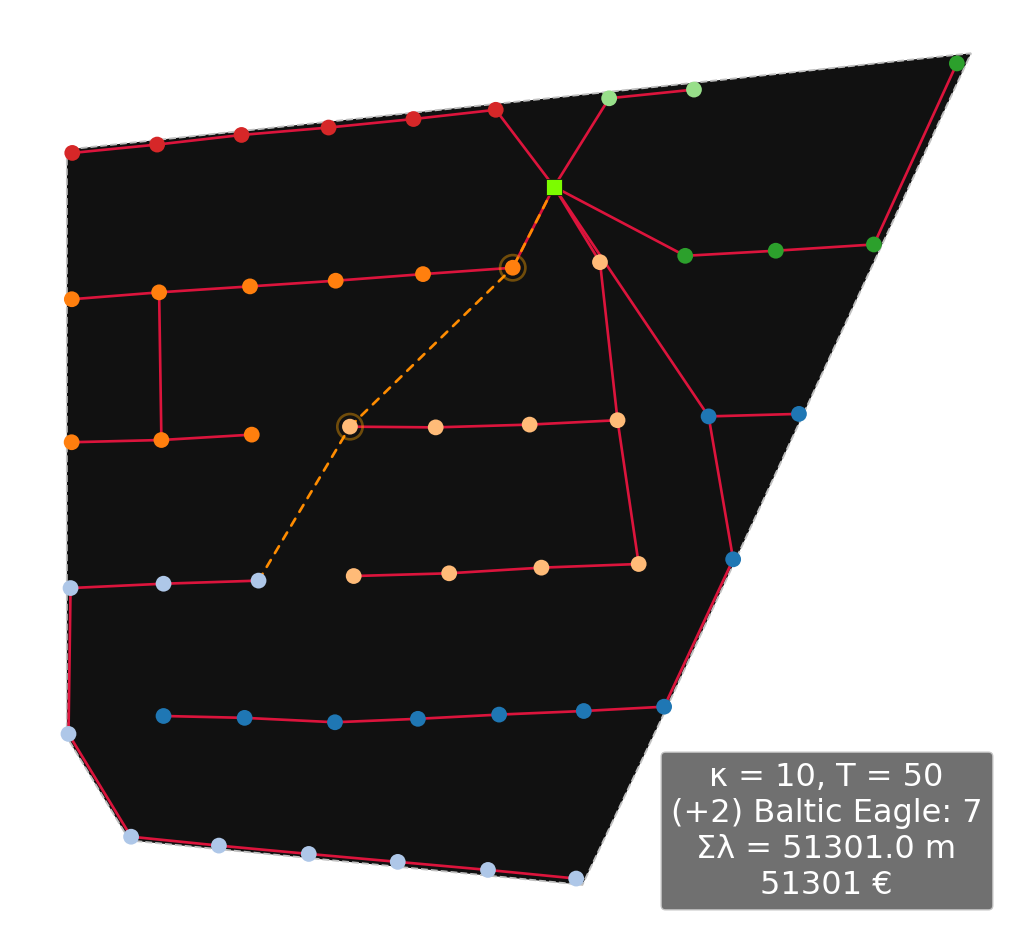

In [10]:
wfn4.plot()

In [11]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.1
L.nodes[10]['label'] = 'A'
wfn = WindFarmNetwork(L=L, cables=10)

res = wfn.optimize(router=router)  # warmstart will be ignored unless valid


In [12]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 0.01
L.nodes[10]['label'] = 'A'
wfn6 = WindFarmNetwork(L=L, cables=10)
res = wfn6.optimize(router=router)

In [13]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.1
L.nodes[20]['power'] = 1 # 0.1
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn7 = WindFarmNetwork(L=L, cables=10)
res = wfn7.optimize(router=router)

In [14]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.01
L.nodes[20]['power'] = 1 # 0.01
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn8 = WindFarmNetwork(L=L, cables=10)
res = wfn8.optimize(router=router)

In [15]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.1
L.nodes[20]['power'] = 1 # 0.01
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn9 = WindFarmNetwork(L=L, cables=10)
res = wfn9.optimize(router=router)

In [16]:
L = locations.eagle
L.nodes[10]['power'] = 1 # 1.01
L.nodes[20]['power'] = 1 # 0.1
L.nodes[10]['label'] = 'A'
L.nodes[20]['label'] = 'B'
wfn10 = WindFarmNetwork(L=L, cables=10)
res = wfn10.optimize(router=router)

<Axes: >

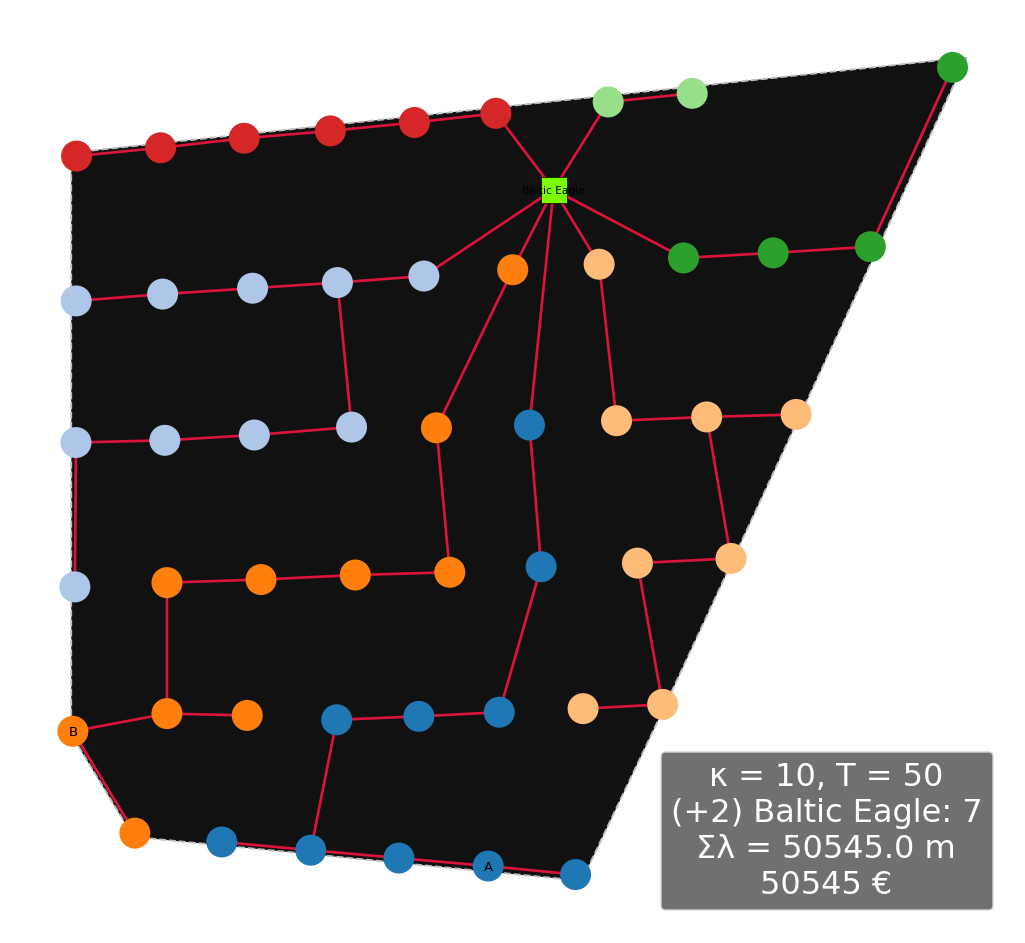

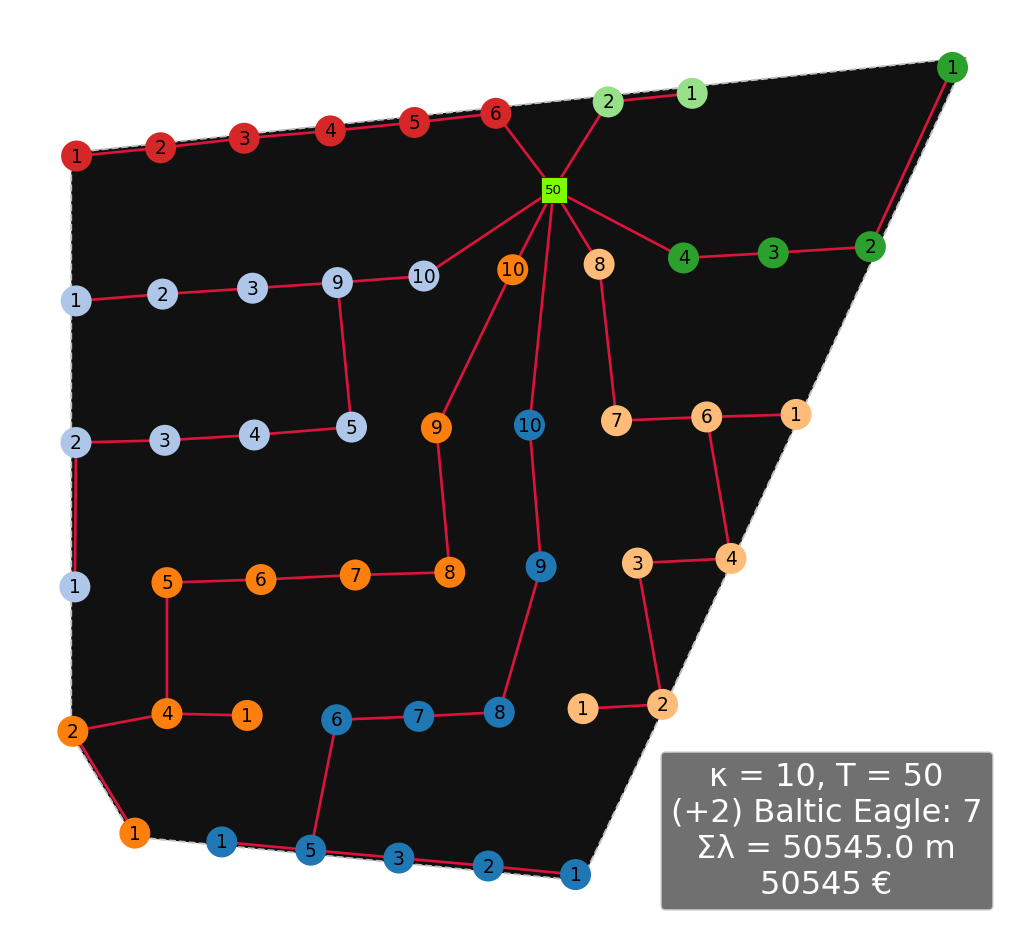

In [17]:
wfn.plot(node_tag='label')
wfn.plot(node_tag='load')